In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [2]:
df=pd.read_csv('corona.csv')
df

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,...,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,...,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,...,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,...,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   Unnamed: 3             0 non-null      float64
 4   summary                1080 non-null   object 
 5   location               1085 non-null   object 
 6   country                1085 non-null   object 
 7   gender                 902 non-null    object 
 8   age                    843 non-null    float64
 9   symptom_onset          563 non-null    object 
 10  If_onset_approximated  560 non-null    float64
 11  hosp_visit_date        507 non-null    object 
 12  exposure_start         128 non-null    object 
 13  exposure_end           341 non-null    object 
 14  visiting Wuhan         1085 non-null   int64  
 15  from

In [4]:
df.isnull().sum()

id                          0
case_in_country           197
reporting date              1
Unnamed: 3               1085
summary                     5
location                    0
country                     0
gender                    183
age                       242
symptom_onset             522
If_onset_approximated     525
hosp_visit_date           578
exposure_start            957
exposure_end              744
visiting Wuhan              0
from Wuhan                  4
death                       0
recovered                   0
symptom                   815
source                      0
link                        0
Unnamed: 21              1085
Unnamed: 22              1085
Unnamed: 23              1085
Unnamed: 24              1085
Unnamed: 25              1085
Unnamed: 26              1085
dtype: int64

In [5]:
for col in df.columns:
    print (f'name is {col}')
    print(df[col].value_counts())
    print('\n')

name is id
1085    1
356     1
370     1
369     1
368     1
       ..
718     1
717     1
716     1
715     1
1       1
Name: id, Length: 1085, dtype: int64


name is case_in_country
1.0      37
2.0      24
3.0      22
6.0      19
9.0      19
         ..
149.0     1
147.0     1
141.0     1
135.0     1
140.0     1
Name: case_in_country, Length: 197, dtype: int64


name is reporting date
2/27/2020    91
2/20/2020    73
1/22/2020    61
2/26/2020    54
1/25/2020    52
2/25/2020    46
2/19/2020    42
1/24/2020    41
2/21/2020    35
2/24/2020    33
2/22/2020    31
1/31/2020    28
1/27/2020    28
02/08/20     26
2/23/2020    26
2/28/2020    25
02/06/20     24
1/23/2020    24
1/26/2020    24
02/04/20     24
1/30/2020    23
02/05/20     22
2/14/2020    21
1/29/2020    20
02/10/20     19
02/09/20     19
1/28/2020    18
1/21/2020    18
2/13/2020    18
2/16/2020    16
2/17/2020    14
2/15/2020    13
02/11/20     13
2/18/2020    13
02/01/20     12
02/02/20     10
02/07/20      8
02/03/20      7
02

In [6]:
df.describe()

,id,case_in_country,Unnamed: 3,age,If_onset_approximated,visiting Wuhan,from Wuhan,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
count,1085.000000,888.000000,0.0,843.000000,560.000000,1085.000000,1081.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,543.000000,48.841216,NaN,49.483689,0.042857,0.176959,0.144311,NaN,NaN,NaN,NaN,NaN,NaN
std,313.356825,78.853528,NaN,18.255334,0.202716,0.381810,0.351567,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,0.250000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,272.000000,11.000000,NaN,35.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,543.000000,28.000000,NaN,51.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,814.000000,67.250000,NaN,64.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,1085.000000,1443.000000,NaN,96.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['recovered'].describe()

count     1085
unique      32
top          0
freq       926
Name: recovered, dtype: object

In [8]:
df.drop("Unnamed: 3",axis=1,inplace=True)
df.drop("Unnamed: 21",axis=1,inplace=True)
df.drop("Unnamed: 22",axis=1,inplace=True)
df.drop("Unnamed: 23",axis=1,inplace=True)
df.drop("Unnamed: 24",axis=1,inplace=True)
df.drop("Unnamed: 25",axis=1,inplace=True)
df.drop("Unnamed: 26",axis=1,inplace=True)
df.drop("symptom",axis=1,inplace=True)
df.drop("exposure_start",axis=1,inplace=True)

In [9]:
df.head()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_end,visiting Wuhan,from Wuhan,death,recovered,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,01/04/20,1,0.0,0,0,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,01/12/20,0,1.0,0,0,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,01/03/20,0,1.0,0,0,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,1,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,0,0.0,0,0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [10]:
df.describe()

,id,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
count,1085.000000,888.000000,843.000000,560.000000,1085.000000,1081.000000
mean,543.000000,48.841216,49.483689,0.042857,0.176959,0.144311
std,313.356825,78.853528,18.255334,0.202716,0.381810,0.351567
min,1.000000,1.000000,0.250000,0.000000,0.000000,0.000000
25%,272.000000,11.000000,35.000000,0.000000,0.000000,0.000000
50%,543.000000,28.000000,51.000000,0.000000,0.000000,0.000000
75%,814.000000,67.250000,64.000000,0.000000,0.000000,0.000000
max,1085.000000,1443.000000,96.000000,1.000000,1.000000,1.000000


In [11]:
df["id"] = pd.to_numeric(df["id"], errors='coerce')
df["case_in_country"] = pd.to_numeric(df["case_in_country"], errors='coerce')
df["If_onset_approximated"] = pd.to_numeric(df["If_onset_approximated"], errors='coerce')
df["from Wuhan"] = pd.to_numeric(df["from Wuhan"], errors='coerce')
df["visiting Wuhan"] = pd.to_numeric(df["visiting Wuhan"], errors='coerce')
df["age"] = pd.to_numeric(df["age"], errors='coerce')
df["recovered"] = pd.to_numeric(df["recovered"], errors='coerce')
df["death"] = pd.to_numeric(df["death"], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   summary                1080 non-null   object 
 4   location               1085 non-null   object 
 5   country                1085 non-null   object 
 6   gender                 902 non-null    object 
 7   age                    843 non-null    float64
 8   symptom_onset          563 non-null    object 
 9   If_onset_approximated  560 non-null    float64
 10  hosp_visit_date        507 non-null    object 
 11  exposure_end           341 non-null    object 
 12  visiting Wuhan         1085 non-null   int64  
 13  from Wuhan             1081 non-null   float64
 14  death                  1064 non-null   float64
 15  reco

In [13]:
df['reporting date']=pd.to_datetime(df['reporting date'],format='%m/%d/%Y',errors="coerce")
df['symptom_onset']=pd.to_datetime(df['symptom_onset'],format='%m/%d/%Y',errors="coerce")
df['hosp_visit_date']=pd.to_datetime(df['hosp_visit_date'],format='%m/%d/%Y',errors="coerce")
df['exposure_end']=pd.to_datetime(df['exposure_end'],format='%m/%d/%Y',errors="coerce")


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     1085 non-null   int64         
 1   case_in_country        888 non-null    float64       
 2   reporting date         894 non-null    datetime64[ns]
 3   summary                1080 non-null   object        
 4   location               1085 non-null   object        
 5   country                1085 non-null   object        
 6   gender                 902 non-null    object        
 7   age                    843 non-null    float64       
 8   symptom_onset          396 non-null    datetime64[ns]
 9   If_onset_approximated  560 non-null    float64       
 10  hosp_visit_date        377 non-null    datetime64[ns]
 11  exposure_end           295 non-null    datetime64[ns]
 12  visiting Wuhan         1085 non-null   int64         
 13  fro

In [15]:
df.isnull().sum()

id                         0
case_in_country          197
reporting date           191
summary                    5
location                   0
country                    0
gender                   183
age                      242
symptom_onset            689
If_onset_approximated    525
hosp_visit_date          708
exposure_end             790
visiting Wuhan             0
from Wuhan                 4
death                     21
recovered                152
source                     0
link                       0
dtype: int64

In [16]:
df['case_in_country'].isnull().sum()

197

In [17]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')

In [18]:
df['id']=imputer.fit_transform(df[['id']])
df['case_in_country']=imputer.fit_transform(df[['case_in_country']])
df['age']=imputer.fit_transform(df[['age']])
df['If_onset_approximated']=imputer.fit_transform(df[['If_onset_approximated']])
df['visiting Wuhan']=imputer.fit_transform(df[['visiting Wuhan']])
df['from Wuhan']=imputer.fit_transform(df[['from Wuhan']])
df["death"]=imputer.fit_transform(df[['from Wuhan']])
df["recovered"]=imputer.fit_transform(df[['from Wuhan']])

In [19]:
df['case_in_country'].isnull().sum()

0

In [20]:
df["summary"].isnull().sum()

5

In [21]:
df["summary"].fillna(df["summary"].mode()[0],inplace=True)
df["location"].fillna(df["location"].mode()[0],inplace=True)
df["country"].fillna(df["country"].mode()[0],inplace=True)
df["gender"].fillna(df["gender"].mode()[0],inplace=True)
df["source"].fillna(df["source"].mode()[0],inplace=True)
df["link"].fillna(df["link"].mode()[0],inplace=True)

In [22]:
df["summary"].isnull().sum()

0

In [23]:
df["reporting date"].isnull().sum()

191

In [24]:
df["reporting date"] = pd.to_datetime(df["reporting date"], errors='coerce')
df["reporting date"].fillna(df["reporting date"].mode()[0],inplace=True)
df["symptom_onset"] = pd.to_datetime(df["symptom_onset"], errors='coerce')
df["symptom_onset"].fillna(df["symptom_onset"].mode()[0],inplace=True)
df["hosp_visit_date"] = pd.to_datetime(df["hosp_visit_date"], errors='coerce')
df["hosp_visit_date"].fillna(df["hosp_visit_date"].mode()[0],inplace=True)
df["exposure_end"] = pd.to_datetime(df["exposure_end"], errors='coerce')
df["exposure_end"].fillna(df["exposure_end"].mode()[0],inplace=True)

In [25]:
df["reporting date"].isnull().sum()

0

In [26]:
df.head()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_end,visiting Wuhan,from Wuhan,death,recovered,source,link
0,1.0,28.0,2020-01-20,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,2020-01-23,0.0,2020-01-23,2020-01-22,1.0,0.0,0.0,0.0,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2.0,28.0,2020-01-20,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,2020-01-15,0.0,2020-01-15,2020-01-22,0.0,1.0,1.0,1.0,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3.0,28.0,2020-01-21,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,2020-01-23,0.0,2020-01-17,2020-01-22,0.0,1.0,1.0,1.0,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4.0,28.0,2020-01-21,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,2020-01-23,0.0,2020-01-19,2020-01-22,1.0,0.0,0.0,0.0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5.0,28.0,2020-01-21,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,2020-01-23,0.0,2020-01-14,2020-01-22,0.0,0.0,0.0,0.0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


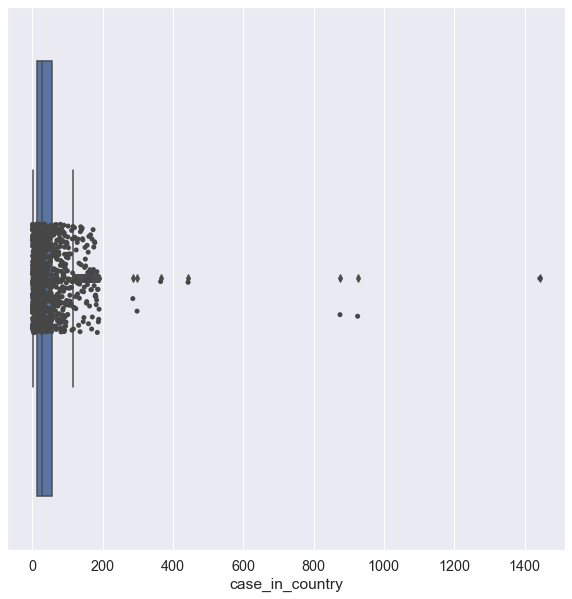

In [27]:
sns.boxplot(x='case_in_country', data=df)
sns.stripplot(x='case_in_country', data=df, color="#474646")

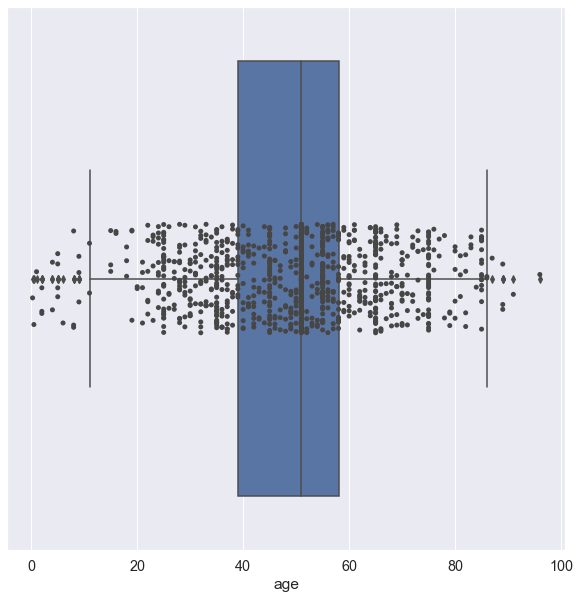

In [28]:
sns.boxplot(x='age', data=df)
sns.stripplot(x='age', data=df, color="#474646")

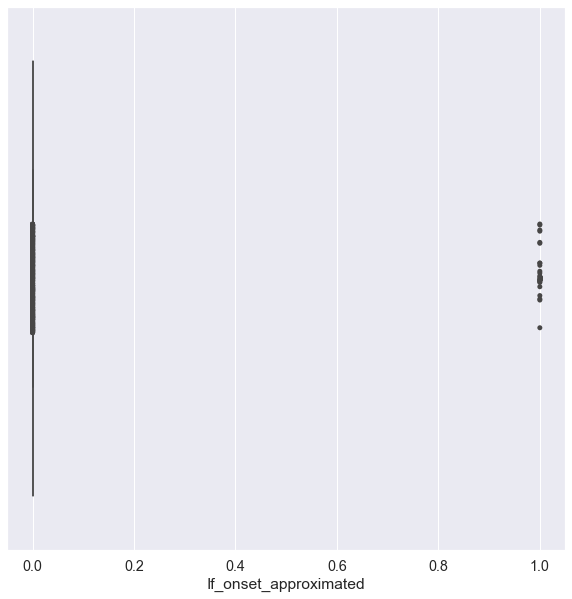

In [29]:
sns.boxplot(x='If_onset_approximated', data=df)
sns.stripplot(x='If_onset_approximated', data=df, color="#474646")

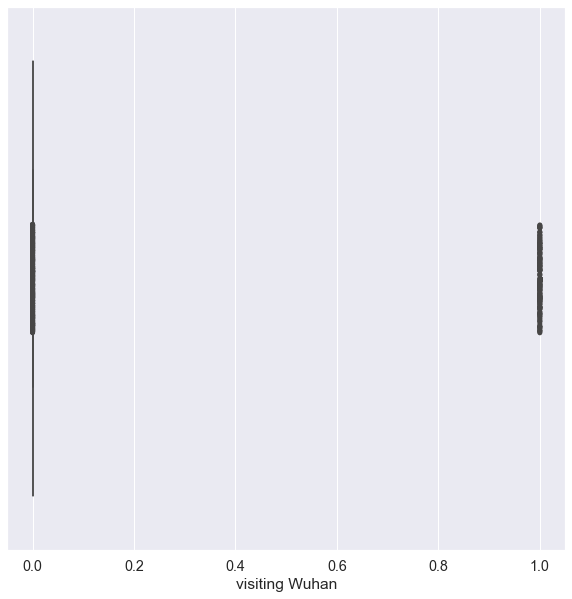

In [30]:
sns.boxplot(x='visiting Wuhan', data=df)
sns.stripplot(x='visiting Wuhan', data=df, color="#474646")


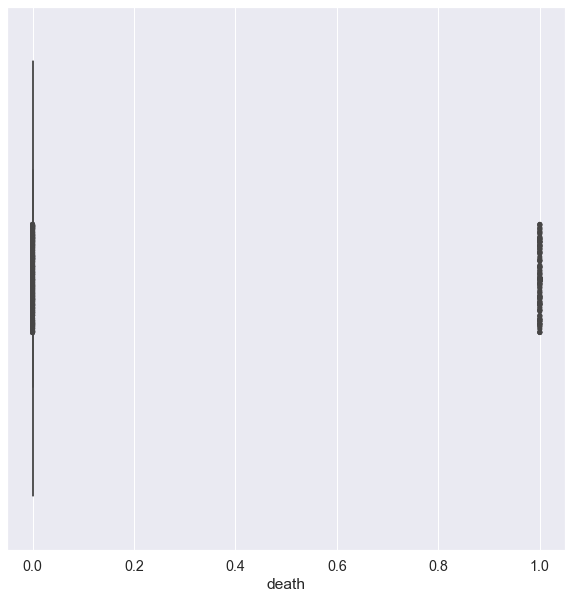

In [31]:
sns.boxplot(x='death', data=df)
sns.stripplot(x='death', data=df, color="#474646")

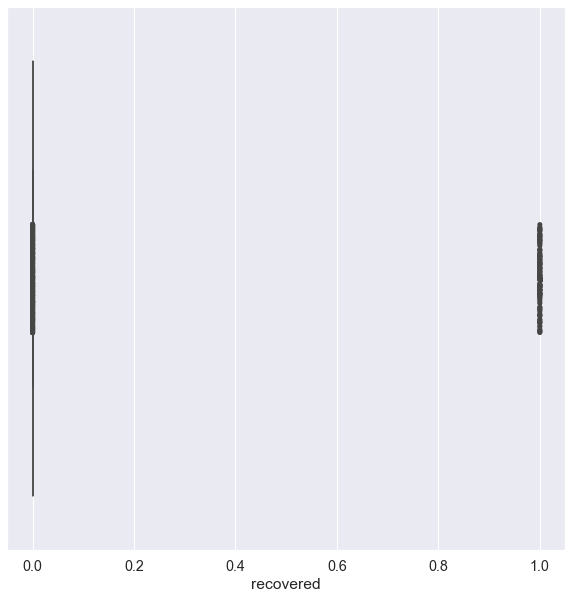

In [32]:
sns.boxplot(x='recovered', data=df)
sns.stripplot(x='recovered', data=df, color="#474646")

In [33]:
from scipy import stats

In [34]:
df.loc[np.abs(stats.zscore(df['case_in_country'])) > 3, 'case_in_country'] = df['case_in_country'].median()
df.loc[np.abs(stats.zscore(df['age'])) > 3, 'age'] = df['age'].median()
df.loc[np.abs(stats.zscore(df['If_onset_approximated'])) > 3, 'If_onset_approximated'] = df['If_onset_approximated'].median()
df.loc[np.abs(stats.zscore(df['visiting Wuhan'])) > 3, 'visiting Wuhan'] = df['visiting Wuhan'].median()
df.loc[np.abs(stats.zscore(df['death'])) > 3, 'death'] = df['death'].median()
df.loc[np.abs(stats.zscore(df['recovered'])) > 3, 'recovered'] = df['recovered'].median()


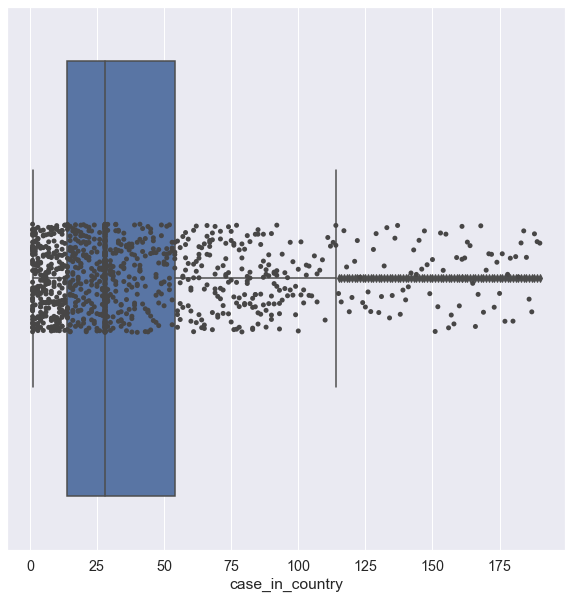

In [35]:
sns.boxplot(x='case_in_country', data=df)
sns.stripplot(x='case_in_country', data=df, color="#474646")

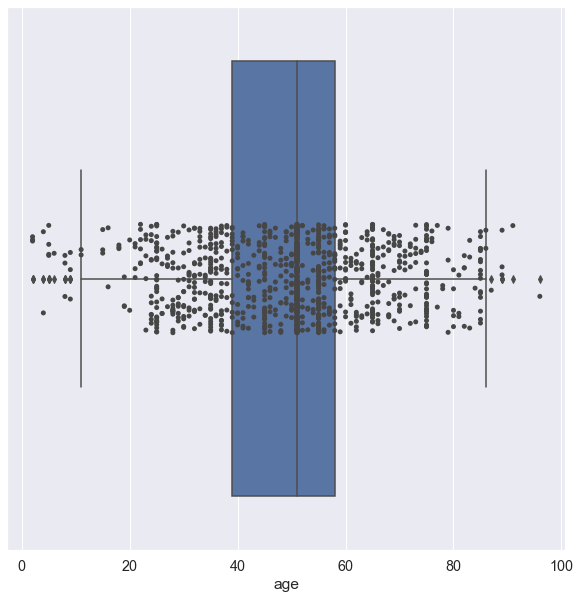

In [36]:
sns.boxplot(x='age', data=df)
sns.stripplot(x='age', data=df, color="#474646")

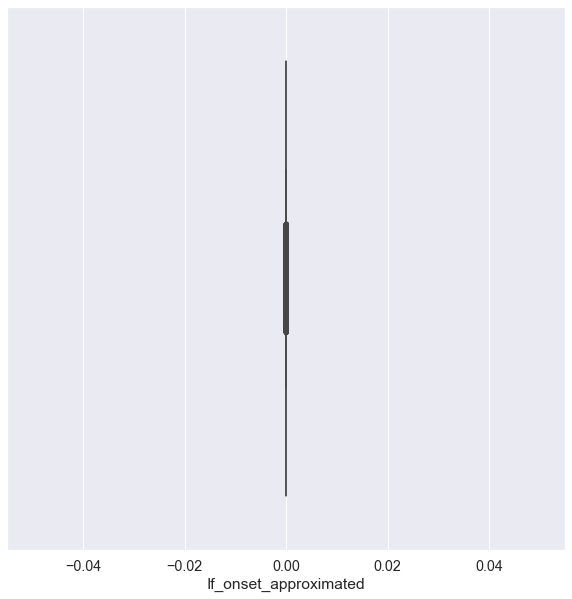

In [37]:
sns.boxplot(x='If_onset_approximated', data=df)
sns.stripplot(x='If_onset_approximated', data=df, color="#474646")

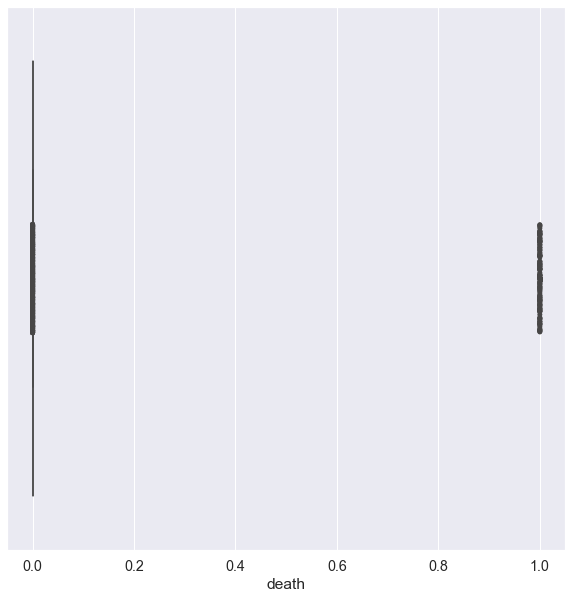

In [38]:
sns.boxplot(x='death', data=df)
sns.stripplot(x='death', data=df, color="#474646")

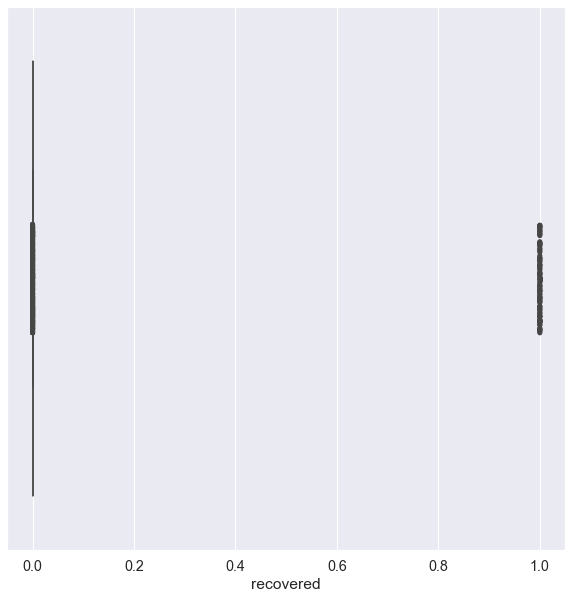

In [39]:
sns.boxplot(x='recovered', data=df)
sns.stripplot(x='recovered', data=df, color="#474646")

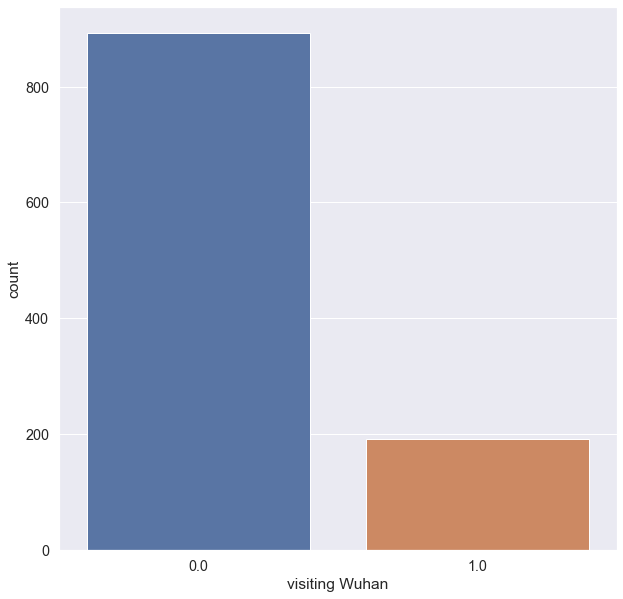

In [40]:
sns.countplot(df['visiting Wuhan'])

In [41]:
df['visiting Wuhan'].value_counts()

0.0    893
1.0    192
Name: visiting Wuhan, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [43]:
x = df.drop('visiting Wuhan', axis=1)
y = df['visiting Wuhan']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

In [44]:
td=pd.concat([x_train,y_train],axis=1)

In [45]:
not_fraud=td[td['visiting Wuhan']==0]
fraud=td[td['visiting Wuhan']==1]
fraud_upsampled=resample(fraud,replace=True,n_samples=len(not_fraud),random_state=27)
upsampled=pd.concat([not_fraud,fraud_upsampled])

In [46]:
upsampled['visiting Wuhan'].value_counts()

1.0    669
0.0    669
Name: visiting Wuhan, dtype: int64

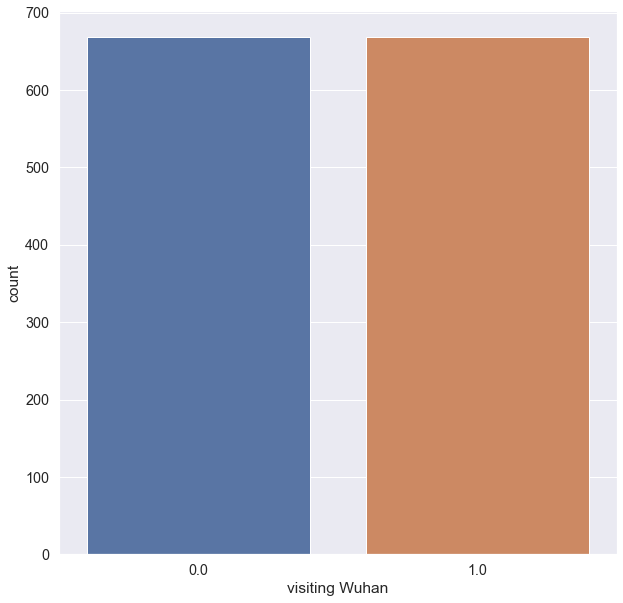

In [47]:
sns.countplot(upsampled['visiting Wuhan'])

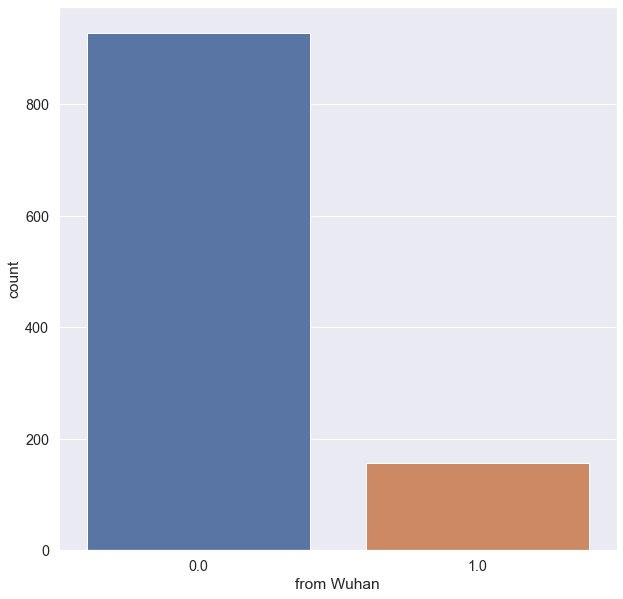

In [48]:
sns.countplot(df['from Wuhan'])

In [49]:
df['from Wuhan'].value_counts() 

0.0    929
1.0    156
Name: from Wuhan, dtype: int64

In [56]:
x=df.drop('from Wuhan',axis=1)
y=df['from Wuhan']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

In [58]:
td=pd.concat([x_train,y_train],axis=1)


In [62]:
not_fraud=td[td['from Wuhan']==0]
fraud=td[td['from Wuhan']==1]
fraud_upsampled=resample(fraud,replace=True,n_samples=len(not_fraud),random_state=27)
upsampled=pd.concat([not_fraud,fraud_upsampled])

In [63]:
upsampled['from Wuhan'].value_counts() 

1.0    697
0.0    697
Name: from Wuhan, dtype: int64

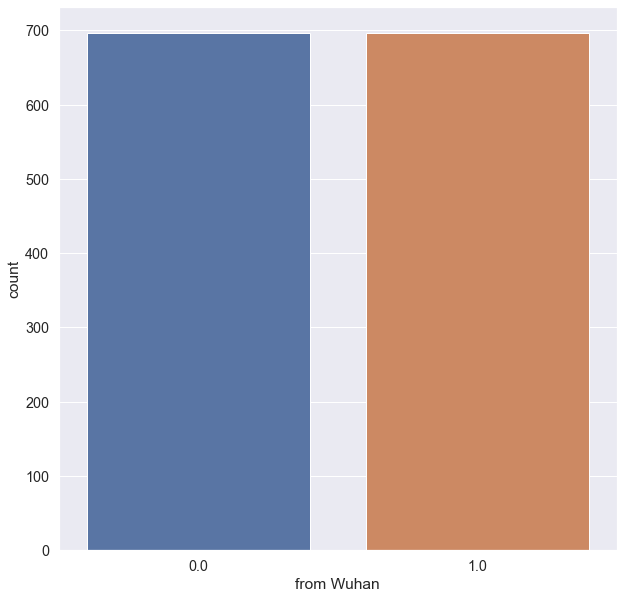

In [64]:
sns.countplot(upsampled['from Wuhan'])

In [65]:
x = df.drop('recovered', axis=1)
y = df['recovered']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

In [72]:
x_train

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_end,visiting Wuhan,from Wuhan,death,source,link
862,863.0,14.0,2020-02-27,new confirmed COVID-19 patient in UAE: Iranian...,UAE,UAE,male,51.0,2020-01-23,0.0,2020-01-23,2020-01-22,0.0,0.0,0.0,The National,https://www.thenational.ae/uae/health/coronavi...
658,659.0,2.0,2020-01-24,new confirmed COVID-19 patient in Taiwan: fema...,Taiwan,Taiwan,female,55.0,2020-01-23,0.0,2020-01-23,2020-01-21,1.0,0.0,0.0,Taiwan News,https://www.taiwannews.com.tw/en/news/3866003
252,253.0,17.0,2020-02-27,new confirmed COVID-19 patient in Japan: femal...,Chiba Prefecture,Japan,female,35.0,2020-01-30,0.0,2020-01-31,2020-01-22,0.0,1.0,1.0,Ministry of Health,https://www.mhlw.go.jp/stf/houdou/houdou_list_...
706,707.0,16.0,2020-01-31,new confirmed COVID-19 patient in Thailand: Ch...,Thailand,Thailand,male,51.0,2020-01-23,0.0,2020-01-23,2020-01-22,1.0,0.0,0.0,Channel News Asia,https://www.channelnewsasia.com/news/asia/wuha...
215,216.0,19.0,2020-02-27,new confirmed COVID-19 patient in France: Pari...,Paris,France,male,51.0,2020-01-23,0.0,2020-01-23,2020-01-22,0.0,0.0,0.0,nice matin,https://www.nicematin.com/sante/un-premier-cas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1034.0,1.0,2020-02-19,"new confirmed COVID-19 patient in Iran: died, ...",Qom,Iran,male,51.0,2020-01-23,0.0,2020-01-23,2020-01-22,0.0,0.0,0.0,ABC News,https://abcnews.go.com/International/wireStory...
763,764.0,14.0,2020-02-27,new confirmed COVID-19 patient in Vietnam: 2/9...,Vinh Phuc,Vietnam,female,55.0,2020-01-23,0.0,2020-01-23,2020-01-28,0.0,0.0,0.0,Vietnam News,https://vietnamnews.vn/society/591803/viet-nam...
835,836.0,41.0,2020-02-27,new confirmed COVID-19 patient in Germany: Ham...,Hamburg,Germany,male,51.0,2020-02-26,0.0,2020-02-27,2020-01-22,0.0,0.0,0.0,Suede Deutsche,https://www.sueddeutsche.de/panorama/coronavir...
559,560.0,17.0,2020-02-27,new confirmed COVID-19 patient in South Korea:...,South Korea,South Korea,male,37.0,2020-01-26,0.0,2020-01-23,2020-01-23,0.0,0.0,0.0,South China Morning Post,https://www.scmp.com/news/asia/east-asia/artic...


In [73]:
y_train

862     0.0
658     0.0
252     1.0
706     0.0
215     0.0
       ... 
1033    0.0
763     0.0
835     0.0
559     0.0
684     0.0
Name: recovered, Length: 813, dtype: float64

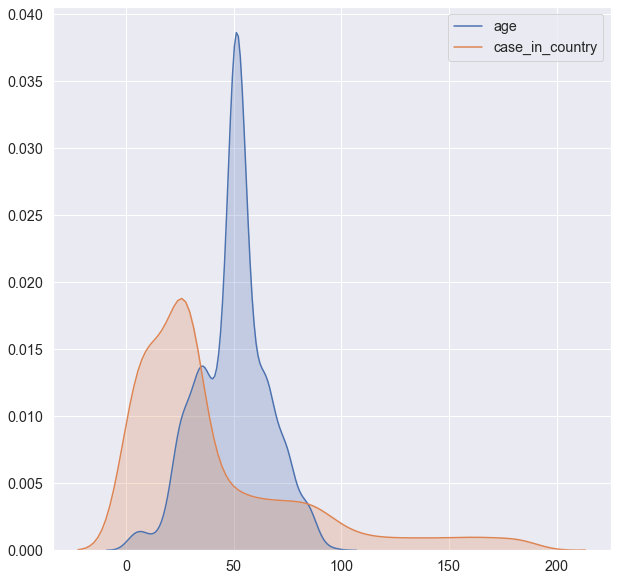

In [75]:
sns.kdeplot(df['age'], shade=True)
sns.kdeplot(df['case_in_country'], shade=True)

In [76]:
df.head()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_end,visiting Wuhan,from Wuhan,death,recovered,source,link
0,1.0,28.0,2020-01-20,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,2020-01-23,0.0,2020-01-23,2020-01-22,1.0,0.0,0.0,0.0,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2.0,28.0,2020-01-20,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,2020-01-15,0.0,2020-01-15,2020-01-22,0.0,1.0,1.0,1.0,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3.0,28.0,2020-01-21,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,2020-01-23,0.0,2020-01-17,2020-01-22,0.0,1.0,1.0,1.0,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4.0,28.0,2020-01-21,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,2020-01-23,0.0,2020-01-19,2020-01-22,1.0,0.0,0.0,0.0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5.0,28.0,2020-01-21,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,2020-01-23,0.0,2020-01-14,2020-01-22,0.0,0.0,0.0,0.0,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
